In [1]:
from fish_helpers import *

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [186]:
md = Metadata('/hybedata/Images/Robert/TBI_v2/sham_m3_slide4_2019Nov04/')

In [188]:
pos = md.posnames[5]
z = 11
stk = md.stkread(Position=pos,Zindex=z,Channel=['FarRed','Orange'])

opening img_Pos19_000000011_000000000_FarRed_000_011.tif

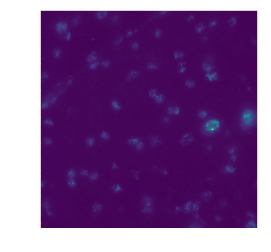

In [189]:

plt.imshow(np.max(stk,axis=2))
plt.show()

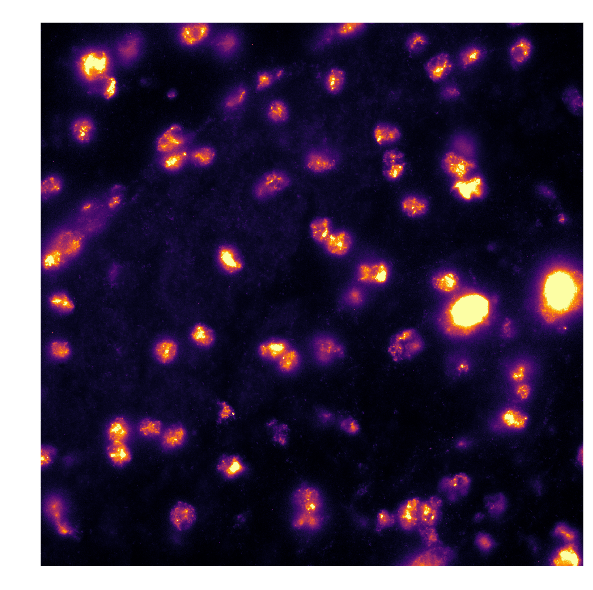

In [190]:
Display(np.max(stk,axis=2))

In [132]:
from analysis_scripts.iterative_classify_codestacks_and_parse import *

In [ ]:
hip = pd.read_csv('/bigstore/binfo/mouse/Hippocampus/GSE74985_genes.fpkm_tracking',sep='\t')
hip_fpkm = pd.DataFrame(index = hip.gene_short_name)
for column in hip.columns:
    if 'FPKM' in column:
        hip_fpkm[column] = list(hip[column])
hip_fpkm['average'] = np.average(hip_fpkm,axis=1)
hip_fpkm

In [135]:
cstk_path = '/hybedata/Images/Robert/TBI_v2/sham_m3_slide4_2019Nov04/codestacks/'
poses = [i for i in os.listdir(cstk_path) if os.path.isdir(os.path.join(cstk_path, i))]
hybedatas = [HybeData(os.path.join(cstk_path, i)) for i in poses]
spotcalls2 = spotcat(hybedatas)

Pos132
Pos265
Pos62
Pos15
Pos155
Pos277
Pos193
Pos245
Pos148
Pos236
Pos289
Pos272
Pos180
Pos122
Pos83
Pos293
Pos287
Pos109
Pos13
Pos280
Pos125
Pos8
Pos5
Pos266
Pos31
Pos256
Pos278
Pos282
Pos235
Pos267
Pos45
Pos187
Pos246
Pos175
Pos243
Pos131
Pos36
Pos53
Pos105
Pos169
Pos292
Pos110
Pos119
Pos152
Pos151
Pos73
Pos200
Pos271
Pos159
Pos194
Pos198
Pos97
Pos191
Pos300
Pos79
Pos224
Pos217
Pos32
Pos59
Pos281
Pos89
Pos177
Pos82
Pos63
Pos247
Pos74
Pos113
Pos48
Pos302
Pos284
Pos204
Pos238
Pos178
Pos150
Pos19
Pos78
Pos189
Pos136
Pos207
Pos162
Pos166
Pos139
Pos201
Pos1
Pos147
Pos234
Pos213
Pos244
Pos227
Pos221
Pos37
Pos121
Pos101
Pos128
Pos276
Pos145
Pos263
Pos102
Pos190
Pos77
Pos142
Pos167
Pos84
Pos170
Pos133
Pos27
Pos39
Pos116
Pos134
Pos157
Pos118
Pos96
Pos211
Pos164
Pos76
Pos242
Pos17
Pos58
Pos80
Pos248
Pos228
Pos160
Pos163
Pos225
Pos71
Pos52
Pos185
Pos212
Pos241
Pos14
Pos279
Pos56
Pos18
Pos50
Pos223
Pos168
Pos112
Pos87
Pos254
Pos64
Pos61
Pos283
Pos6
Pos205
Pos149
Pos251
Pos93
Pos137
Pos174
Pos26

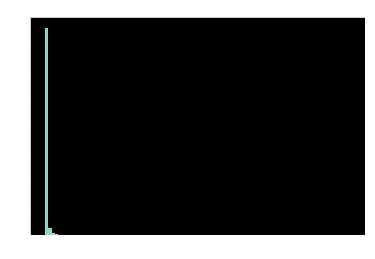

In [138]:
plt.hist(spotcalls2.ave,bins=100)
plt.show()

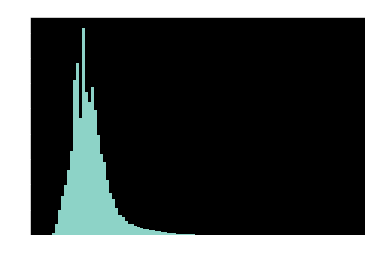

In [139]:
plt.hist(np.log10(spotcalls2.ave),bins=100)
plt.show()

In [145]:
spotcalls2 = pd.read_csv('/scratch/sham_m3_slide4_zach_export.csv')

160


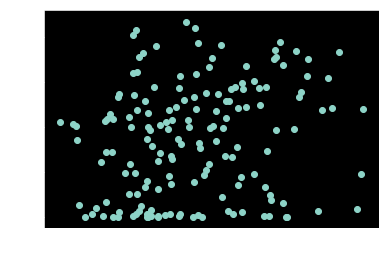

SpearmanrResult(correlation=0.21840518497392722, pvalue=0.005527856612314511)

In [146]:
shared_genes = [i for i in spotcalls2.gene.unique() if i in hip_fpkm.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn,cc in Counter(spotcalls2.gene).items():
    if gn in shared_genes:
        c.append(cc)
        ts = hip_fpkm['average'].loc[gn]
        if isinstance(ts,float):
            s.append(ts)
        else:
            s.append(ts.iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.xlabel('sham_m3_slide4_2019Nov04 counts')
plt.ylabel('bulk hippocampus rnaseq')
plt.show()
spearmanr(c,s)

161


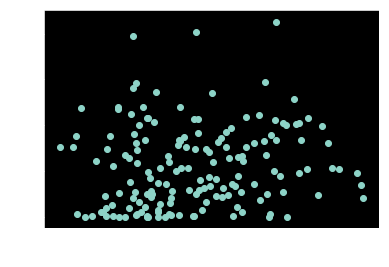

SpearmanrResult(correlation=0.16712675408327585, pvalue=0.034090113397657565)

In [147]:
shared_genes = [i for i in spotcalls2.gene.unique() if i in scseq_averages.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn,cc in Counter(spotcalls2.gene).items():
    if gn in shared_genes:
        c.append(cc)
        tc = scseq_averages.loc[gn]
        if len(tc)==1:
            s.append(tc.iloc[0])
        else:
            s.append(tc.iloc[0].iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.xlabel('sham_m3_slide4_2019Nov04 counts')
plt.ylabel('average HIP smartseq')
plt.show()
spearmanr(c,s)

In [141]:
spotcalls = pickle.load(open('/hybedata/Images/Robert/TBI_v2/sham_m3_slide4_2019Nov04/codestacks/purged_spotcalls.pkl','rb'))


In [105]:
hip = pd.read_csv('/bigstore/binfo/mouse/Hippocampus/GSE74985_genes.fpkm_tracking',sep='\t')
hip_fpkm = pd.DataFrame(index = hip.gene_short_name)
for column in hip.columns:
    if 'FPKM' in column:
        hip_fpkm[column] = list(hip[column])
hip_fpkm['average'] = np.average(hip_fpkm,axis=1)
hip_fpkm

,dg_d_FPKM,dg_v_FPKM,ca4_FPKM,ca3_d_FPKM,ca3_v_FPKM,ca2_FPKM,ca1_d_FPKM,ca1_v_FPKM,average
gene_short_name,,,,,,,,,
Gnai3,8.131250,11.763400,10.673600,18.301500,10.505900,10.71920,7.859310,9.818570,10.971591
Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Cdc45,0.000000,2.597860,1.023760,0.621743,1.248480,2.20752,0.201932,1.372640,1.159242
H19,0.000000,0.000000,0.008192,0.178003,0.000000,0.00000,0.000000,0.000000,0.023274
Scml2,0.011255,0.303125,0.039321,0.031681,0.185555,0.69732,0.011220,0.088365,0.170980
...,...,...,...,...,...,...,...,...,...
-,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
-,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
-,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [8]:
spotcalls

,gene,ssum,centroid,ave,npixels,cword_idx,z,posname,CoordX,CoordY
0,Gad2,351.0,"(1.0, 243.5)",21.937500,4,54,2,Pos1,2437.541500,-3086.891000
1,Nes,402.0,"(3.0, 1681.25)",25.125000,4,102,2,Pos1,2594.256250,-3086.673000
2,Casp8,476.0,"(3.5, 1646.0)",19.833333,6,16,2,Pos1,2590.414000,-3086.618500
3,Gfra1,829.0,"(3.4, 1790.8)",41.450000,5,56,2,Pos1,2606.197200,-3086.629400
4,Fezf2,1615.0,"(5.142857142857143, 1300.5714285714287)",57.678571,7,46,2,Pos1,2552.762286,-3086.439429
...,...,...,...,...,...,...,...,...,...,...
7310565,Fezf2,1387.0,"(2025.75, 1308.125)",43.343750,8,46,26,Pos99,4029.585625,-3498.193250
7310566,Flt1,382.0,"(2034.0, 346.5)",23.875000,4,49,26,Pos99,3924.768500,-3497.294000
7310567,Bcan,1307.0,"(2041.5, 331.125)",40.843750,8,10,26,Pos99,3923.092625,-3496.476500
7310568,Bptf,1888.0,"(2043.3333333333333, 336.77777777777777)",52.444444,9,11,26,Pos99,3923.708778,-3496.276667


160


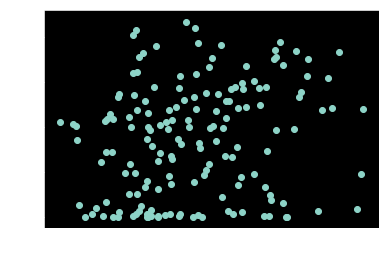

SpearmanrResult(correlation=0.21840518497392722, pvalue=0.005527856612314511)

In [123]:
shared_genes = [i for i in spotcalls.gene.unique() if i in hip_fpkm.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn,cc in Counter(spotcalls.gene).items():
    if gn in shared_genes:
        c.append(cc)
        ts = hip_fpkm['average'].loc[gn]
        if isinstance(ts,float):
            s.append(ts)
        else:
            s.append(ts.iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.xlabel('sham_m3_slide4_2019Nov04 counts')
plt.ylabel('bulk hippocampus rnaseq')
plt.show()
spearmanr(c,s)

157


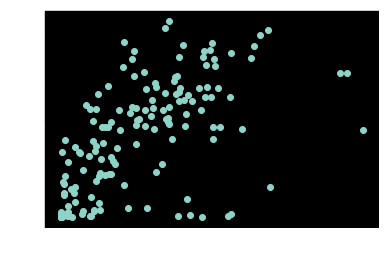

SpearmanrResult(correlation=0.6648866236295079, pvalue=2.1856203246970227e-21)

In [124]:
shared_genes = [i for i in spotcalls.gene.unique() if i in hip_fpkm.index]
shared_genes = [i for i in shared_genes if i in scseq_averages.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn in shared_genes:
    ts = hip_fpkm['average'].loc[gn]
    if isinstance(ts,float):
        s.append(ts)
    else:
        s.append(ts.iloc[0])
    tc = scseq_averages.loc[gn]
    if len(tc)==1:
        c.append(tc.iloc[0])
    else:
        c.append(tc.iloc[0].iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.xlabel('average HIP smartseq')
plt.ylabel('bulk hippocampus rnaseq')
plt.show()
spearmanr(c,s)

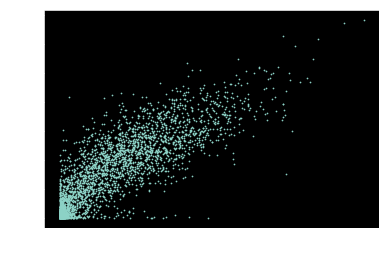

SpearmanrResult(correlation=0.9157710414587542, pvalue=0.0)

In [127]:
shared_genes = [i for i in hip_fpkm.index if i in scseq_averages.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn in shared_genes:
    ts = hip_fpkm['average'].loc[gn]
    if isinstance(ts,float):
        s.append(ts)
    else:
        s.append(ts.iloc[0])
    tc = scseq_averages.loc[gn]
    if len(tc)==1:
        c.append(tc.iloc[0])
    else:
        c.append(tc.iloc[0].iloc[0])
m = random.sample(range(0,len(c)),5000)
plt.scatter(np.log10(np.array(c)+1)[m],np.log10(np.array(s)+1)[m],s=0.5)
plt.xlabel('average HIP smartseq')
plt.ylabel('bulk hippocampus rnaseq')
plt.show()
spearmanr(c,s)

161


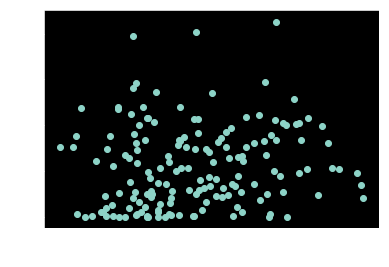

SpearmanrResult(correlation=0.16712675408327585, pvalue=0.034090113397657565)

In [129]:
shared_genes = [i for i in spotcalls.gene.unique() if i in scseq_averages.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn,cc in Counter(spotcalls.gene).items():
    if gn in shared_genes:
        c.append(cc)
        tc = scseq_averages.loc[gn]
        if len(tc)==1:
            s.append(tc.iloc[0])
        else:
            s.append(tc.iloc[0].iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.xlabel('sham_m3_slide4_2019Nov04 counts')
plt.ylabel('average HIP smartseq')
plt.show()
spearmanr(c,s)

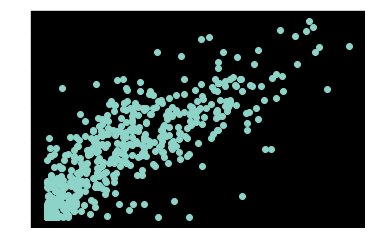

In [122]:
m = random.sample(range(0,len(c)),1000)
plt.scatter(np.log10(np.array(c)+1)[m],np.log10(np.array(s)+1)[m])
plt.show()

In [79]:
seq_base = '/bigstore/binfo/mouse/Hippocampus/GSE142681/Aligned2/'
fpkms = pd.DataFrame()
for i in os.listdir(seq_base):
    try:
        seq = pd.read_csv(os.path.join(seq_base,i,'genes.fpkm_tracking'),sep='\t')
        fpkms[i] = list(seq.FPKM)
        fpkms.index = seq.gene_short_name
    except:
        continue
# fpkms.index = seq.gene_short_name
fpkms['average'] = np.average(fpkms,axis=1)
fpkms

,12_S4_R1_001.fastq,17_S9_R1_001.fastq,9_S1_R1_001.fastq,average
gene_short_name,,,,
4933401J01Rik,0.0,0.0,0.0,0.0
Gm26206,0.0,0.0,0.0,0.0
Gm10568,0.0,0.0,0.0,0.0
Gm38385,0.0,0.0,0.0,0.0
Gm27396,0.0,0.0,0.0,0.0
...,...,...,...,...
CAAA01205117.1,0.0,0.0,0.0,0.0
CAAA01098150.1,0.0,0.0,0.0,0.0
CAAA01064564.1,0.0,0.0,0.0,0.0


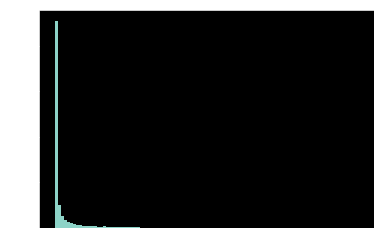

In [80]:
plt.hist(np.log10(fpkms[fpkms['average']>0]['average']+1),bins=100)
plt.show()

In [81]:
shared_genes = [i for i in spotcalls.gene.unique() if i in fpkms.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
len(shared_genes)

168

In [82]:
seq_averages = pd.DataFrame(fpkms['average'].loc[shared_genes])
len(seq_averages)

170

In [83]:
k = []
c = []
s = []
for gn,cc in Counter(spotcalls.gene).items():
    if gn in shared_genes:
        k.append(gn)
        c.append(cc)
        ts = seq_averages.loc[gn]
        if len(ts)==1:
            s.append(ts.iloc[0])
        else:
            s.append(ts.iloc[0].iloc[0])

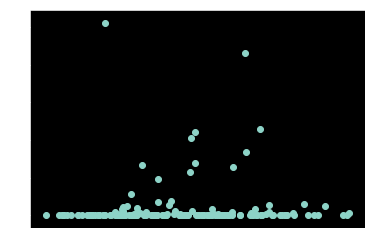

In [84]:
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.show()

In [51]:
from scipy.io import mmread
scseq = mmread('/bigstore/binfo/mouse/Brain/Sequencing/Smartseq/Hippocampus/counts.mtx')
scseq = scseq.A

<4687x45768 sparse matrix of type '<class 'numpy.int64'>'
	with 33074373 stored elements in COOrdinate format>

In [67]:
scseq_norm = (10**5)*np.divide(scseq,np.sum(scseq,axis=1)[:,None])

In [59]:
cells = list(pd.read_csv('/bigstore/binfo/mouse/Brain/Sequencing/Smartseq/Hippocampus/cells.csv',index_col=0)['x'])
genes = list(pd.read_csv('/bigstore/binfo/mouse/Brain/Sequencing/Smartseq/Hippocampus/genes.csv',index_col=0)['x'])

In [68]:
scseq_norm.shape

(4687, 45768)

In [70]:
scseq_averages = pd.DataFrame(np.average(scseq_norm,axis=0),index=genes)
scseq_averages

,0
0610005C13Rik,0.017447
0610006L08Rik,0.002751
0610007P14Rik,14.222026
0610009B22Rik,10.736115
0610009E02Rik,0.103678
...,...
n-R5s142,0.000000
n-R5s143,0.000000
n-R5s144,0.000000
n-R5s146,0.000000


In [72]:
shared_genes = [i for i in spotcalls.gene.unique() if i in fpkms.index]
shared_genes = [i for i in shared_genes if i in genes]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
len(shared_genes)

161

In [74]:
c = []
s = []
for gn in shared_genes:
    ts = seq_averages.loc[gn]
    if len(ts)==1:
        s.append(ts.iloc[0])
    else:
        s.append(ts.iloc[0].iloc[0])
    tc = scseq_averages.loc[gn]
    if len(tc)==1:
        c.append(tc.iloc[0])
    else:
        c.append(tc.iloc[0].iloc[0])

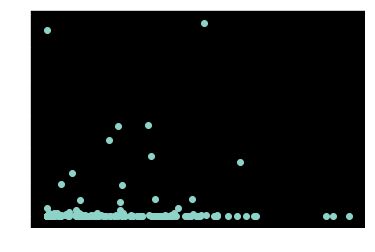

In [77]:
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.show()

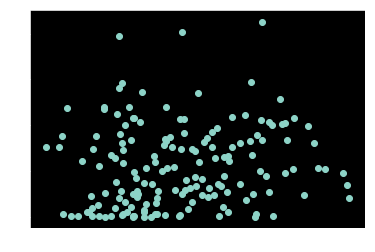

In [78]:
k = []
c = []
s = []
for gn,cc in Counter(spotcalls.gene).items():
    if gn in shared_genes:
        k.append(gn)
        c.append(cc)
        ts = scseq_averages.loc[gn]
        if len(ts)==1:
            s.append(ts.iloc[0])
        else:
            s.append(ts.iloc[0].iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.show()

In [85]:
spearmanr(c,s)


SpearmanrResult(correlation=0.10159734733468702, pvalue=0.19005587003801627)

In [89]:
cornea = pd.read_csv('/bigstore/binfo/mouse/Cornea_FPKM.csv')
cornea = pd.DataFrame(list(cornea.FPKM),index=list(cornea.gene_short_name))
cornea

,0
RP23-34E15.1,3.988990
RP23-34E15.2,0.166372
Gm27396,0.000000
RP23-37D15.1,0.000000
Gm26206,0.000000
...,...
mt-Nd5,691.655000
mt-Nd6,933.623000
mt-Tt,283.482000
mt-Tp,32411.400000


In [90]:
shared_genes = [i for i in spotcalls.gene.unique() if i in cornea.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
len(shared_genes)

165

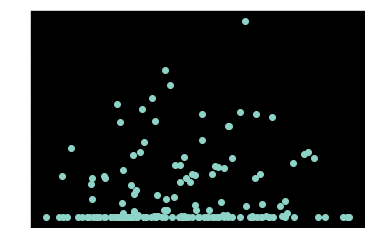

SpearmanrResult(correlation=0.11458664751079661, pvalue=0.14778925727553838)

In [100]:
k = []
c = []
s = []
for gn,cc in Counter(spotcalls.gene).items():
    if gn in shared_genes:
        k.append(gn)
        c.append(cc)
        ts = cornea.loc[gn]
        if len(ts)==1:
            s.append(ts.iloc[0])
        else:
            s.append(ts.iloc[0].iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.show()
spearmanr(c,s)

22470


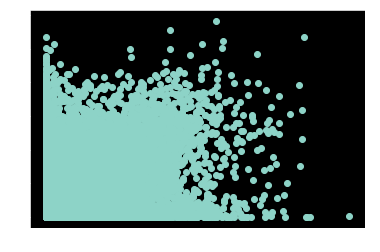

In [95]:
shared_genes = [i for i in genes if i in fpkms.index]
shared_genes = [i for i in shared_genes if i in cornea.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn in shared_genes:
    ts = scseq_averages.loc[gn]
    if len(ts)==1:
        s.append(ts.iloc[0])
    else:
        s.append(ts.iloc[0].iloc[0])
    tc = cornea.loc[gn]
    if len(tc)==1:
        c.append(tc.iloc[0])
    else:
        c.append(tc.iloc[0].iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.show()

In [96]:
spearmanr(c,s)

SpearmanrResult(correlation=0.6239496038585514, pvalue=0.0)

161


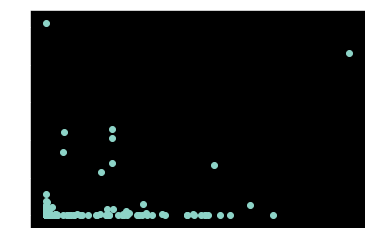

SpearmanrResult(correlation=0.16310687501964857, pvalue=0.03870274249508596)

In [99]:
shared_genes = [i for i in genes if i in seq_averages.index]
shared_genes = [i for i in shared_genes if i in cornea.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn in shared_genes:
    ts = seq_averages.loc[gn]
    if len(ts)==1:
        s.append(ts.iloc[0])
    else:
        s.append(ts.iloc[0].iloc[0])
    tc = cornea.loc[gn]
    if len(tc)==1:
        c.append(tc.iloc[0])
    else:
        c.append(tc.iloc[0].iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.show()
spearmanr(c,s)

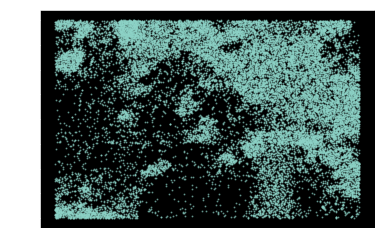

In [17]:
x = 5000
y = 2000
border = 100
temp = sham[(sham.CoordX>x-border)&(sham.CoordX<x+border)&(sham.CoordY>y-border)&(sham.CoordY<y+border)]
plt.scatter(temp.CoordX,temp.CoordY,s=1,alpha=0.5)
plt.show()

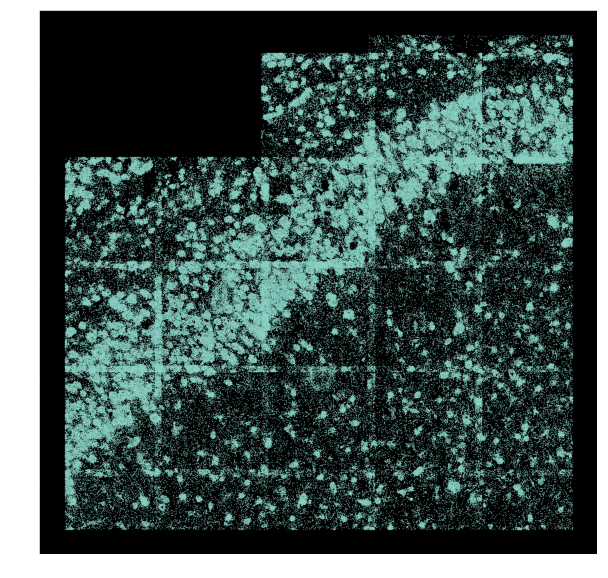

In [23]:
x = 4000
y = 3000
border = 500
temp = sham[(sham.CoordX>x-border)&(sham.CoordX<x+border)&(sham.CoordY>y-border)&(sham.CoordY<y+border)]
plt.figure(figsize=[10,10])
plt.scatter(temp.CoordX,temp.CoordY,s=0.05,alpha=0.5)
plt.show()

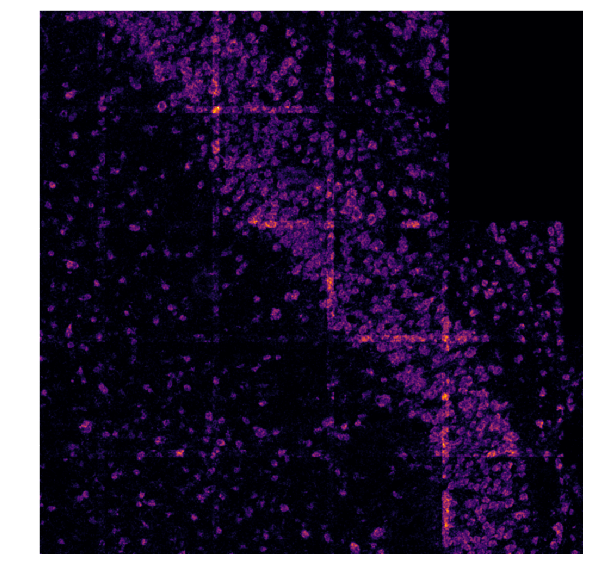

In [30]:
from scipy.ndimage import gaussian_filter
x = 4000
y = 3000
border = 500
temp = sham[(sham.CoordX>x-border)&(sham.CoordX<x+border)&(sham.CoordY>y-border)&(sham.CoordY<y+border)]
plt.figure(figsize=[10,10])
plt.imshow(gaussian_filter(np.histogram2d(temp.CoordX,temp.CoordY,bins=1000)[0],1),cmap='inferno')
plt.show()

In [18]:
spearmanr(X,Y)

SpearmanrResult(correlation=0.6181784521296013, pvalue=1.882794080240573e-18)

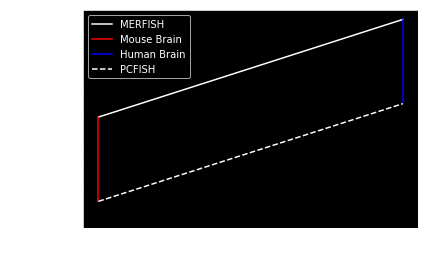

In [77]:
mx = 0.5
hx = 1500
s = 3000/1500
s2 = s/1000

my = mx*s
hy = hx*s
my2 = mx*s2
hy2 = hx*s2

plt.plot([mx,hx],[np.log10(my),np.log10(hy)],c='w',label='MERFISH')
plt.plot([mx,mx],[np.log10(my2),np.log10(my)],c='r',label='Mouse Brain')
plt.plot([hx,hx],[np.log10(hy2),np.log10(hy)],c='b',label='Human Brain')
plt.plot([mx,hx],[np.log10(my2),np.log10(hy2)],c='w',linestyle='dashed',label='PCFISH')
plt.yticks(ticks=[np.log10(1/(365*24)),np.log10(1/(365)),np.log10(1/(52)),np.log10(1/(12)),np.log10(1),np.log10(10),np.log10(100),np.log10(1000)],labels=['Hour','Day','Week','Month','Year','Decade','Century','Millennium'])
plt.xlabel('Volume (cm^3)')
plt.ylabel('Time')
plt.legend()
plt.show()

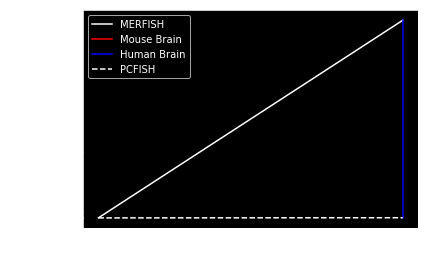

In [79]:
mx = 0.5
hx = 1500
s = 3000/1500
s2 = s/1000

my = mx*s
hy = hx*s
my2 = mx*s2
hy2 = hx*s2

plt.plot([mx,hx],[my,hy],c='w',label='MERFISH')
plt.plot([mx,mx],[my2,my],c='r',label='Mouse Brain')
plt.plot([hx,hx],[hy2,hy],c='b',label='Human Brain')
plt.plot([mx,hx],[my2,hy2],c='w',linestyle='dashed',label='PCFISH')
plt.yticks(ticks=[1/(365*24),1/(365),1/(52),1/(12),1,10,100,1000],labels=['Hour','Day','Week','Month','Year','Decade','Century','Millennium'])
plt.xlabel('Volume (cm^3)')
plt.ylabel('Time')
plt.legend()
plt.show()

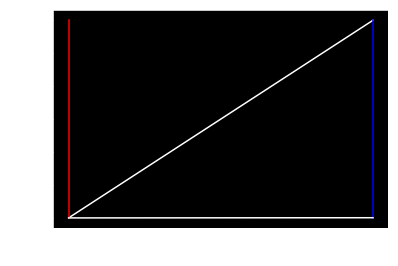

In [64]:
mx = 0.5
hx = 1500
s = 3000/1500
s2 = s/1000

my = mx*s
hy = hx*s
my2 = mx*s2
hy2 = hx*s2

plt.plot([mx,hx],[my,hy],c='w')
plt.plot([mx,mx],[my,hy],c='r')
plt.plot([hx,hx],[my,hy],c='b')
plt.plot([mx,hx],[my2,hy2],c='w')
plt.xlabel('Volume (log10 cm^3)')
plt.ylabel('Time (log10 Years)')
plt.show()

In [182]:
x = range(1,100000)
decimal = 8
y1 = [round((1/3)/i,decimal) for i in x]
y2 = [round((1/(2**i)),decimal) for i in x]
for i in set(y1).intersection(y2):
    print(i,np.where(np.array(y2)==i)[0][0]+1)

6.104e-05 14
7.63e-06 17
3.81e-06 18
3.052e-05 15
1.526e-05 16


In [179]:
1/(2**7)

0.0078125

In [176]:
round((1/3),decimal)/round((1/(2**7)),decimal)

42.73076923076923

In [165]:
y1

[0.3333,
 0.1667,
 0.1111,
 0.0833,
 0.0667,
 0.0556,
 0.0476,
 0.0417,
 0.037,
 0.0333,
 0.0303,
 0.0278,
 0.0256,
 0.0238,
 0.0222,
 0.0208,
 0.0196,
 0.0185,
 0.0175,
 0.0167,
 0.0159,
 0.0152,
 0.0145,
 0.0139,
 0.0133,
 0.0128,
 0.0123,
 0.0119,
 0.0115,
 0.0111,
 0.0108,
 0.0104,
 0.0101,
 0.0098,
 0.0095,
 0.0093,
 0.009,
 0.0088,
 0.0085,
 0.0083,
 0.0081,
 0.0079,
 0.0078,
 0.0076,
 0.0074,
 0.0072,
 0.0071,
 0.0069,
 0.0068,
 0.0067,
 0.0065,
 0.0064,
 0.0063,
 0.0062,
 0.0061,
 0.006,
 0.0058,
 0.0057,
 0.0056,
 0.0056,
 0.0055,
 0.0054,
 0.0053,
 0.0052,
 0.0051,
 0.0051,
 0.005,
 0.0049,
 0.0048,
 0.0048,
 0.0047,
 0.0046,
 0.0046,
 0.0045,
 0.0044,
 0.0044,
 0.0043,
 0.0043,
 0.0042,
 0.0042,
 0.0041,
 0.0041,
 0.004,
 0.004,
 0.0039,
 0.0039,
 0.0038,
 0.0038,
 0.0037,
 0.0037,
 0.0037,
 0.0036,
 0.0036,
 0.0035,
 0.0035,
 0.0035,
 0.0034,
 0.0034,
 0.0034]